# The Sparks Foundation [Grip: Dec,2022]

## Data Science and Business Analytics Internship

# <b><font color='red'>(Task 2- Predicting the optimum number of clusters and representing it visually.)

#### Author- Siddharth Rajput

In [57]:
import matplotlib.pyplot as plt ## Matplotlib for the visualization
import pandas as pd  
%matplotlib inline
import numpy as np
import seaborn as sns

In [8]:
iris_dataset = pd.read_csv('Iris.csv')

In [13]:
iris_dataset.head(10).set_index('Id')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [10]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_dataset.isnull().sum() ## from this statement we can see that there are no null values.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
iris_dataset.shape

(150, 6)

In [107]:
##Renaming the column names
iris_newdata=iris_dataset.rename(columns = {'SepalLengthCm':'SepalLength(cm)','SepalWidthCm':'SepalWidth(cm)',
                               'PetalLengthCm':'PetalLength(cm)','PetalWidthCm':'PetalWidth(cm)'})
iris_newdata.head().set_index('Id')

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Selection for the model

In [108]:
## Feature Selection(Taking only 4 columns for the feature selection)
iris_column = iris_newdata.iloc[ : , [1,2,3,4]].values

### Now we are going to find the n_clusters (The best method to find n_clusters is using Elbow method)

In [109]:
iris_column.shape

(150, 4)

In [125]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(iris_column)
    wcss.append(kmeans.inertia_)
wcss
# inertia_ is the Sum of Squares within cluster
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. 

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.19068792479663,
 30.06387443273313,
 27.842356060606065,
 26.048202248044355]

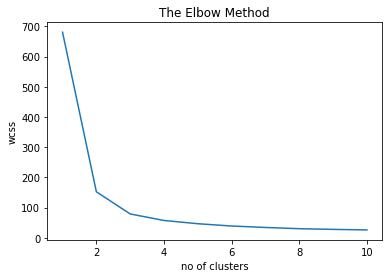

In [112]:
# Visualizing the ELBOW to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

### From the above graph we can see that the elbow is pointing at 3 hence, the value of number of clusters=3

In [118]:
## Building the model
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans = kmeansmodel.fit_predict(iris_column)

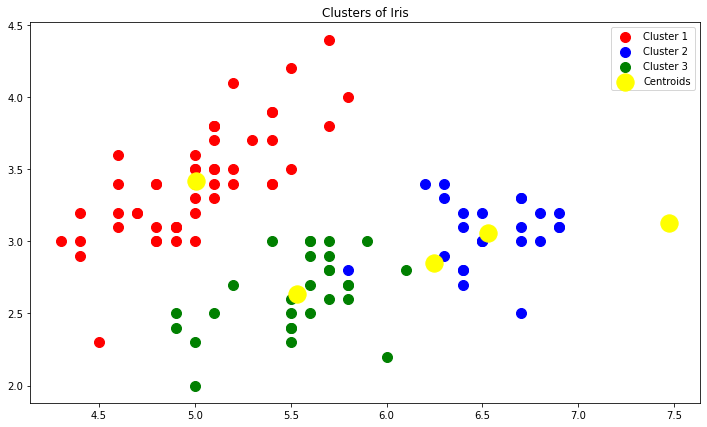

In [131]:
plt.figure(figsize=(12,7))

plt.scatter(iris_column[y_kmeans == 0, 0], iris_column[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris_column[y_kmeans == 1, 0], iris_column[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris_column[y_kmeans == 2, 0], iris_column[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.legend()
plt.show()